# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [3184]:
# If on colab, uncomment the following lines

#! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [3185]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

Methods `describe` and `info` deliver some useful information.

In [3186]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,713,107,53,108,211,63,11,219,31,25,168,228,704,198,69,10,21,190,203
1,7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202
2,547,88,44,70,151,61,8,143,46,18,143,163,311,173,68,7,8,196,203
3,461,106,52,107,211,62,8,200,33,23,161,218,602,200,67,9,17,194,201
4,338,97,45,91,161,63,10,151,45,19,148,166,334,171,65,18,20,197,205
5,206,92,46,79,176,64,8,162,41,20,149,183,396,178,67,2,10,191,198
6,697,92,37,75,184,70,6,154,42,19,131,184,363,127,71,0,4,198,202
7,606,84,37,70,150,61,7,137,49,18,140,156,278,121,64,0,23,196,205
8,255,112,50,110,186,56,11,214,31,24,159,232,676,203,71,18,27,191,202
9,411,78,36,51,116,56,4,120,57,17,124,135,209,135,84,1,12,177,184


In [3187]:
#y_train.shape
X_train_pd[1]

0      107
1       90
2       88
3      106
4       97
      ... 
544     98
545     96
546     88
547    101
548    101
Name: 1, Length: 549, dtype: int64

In [3188]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,423.504554,93.504554,44.697632,81.938069,167.914390,61.438980,8.468124,167.839709,41.092896,20.495446,147.73224,187.624772,433.821494,173.921676,72.306011,6.491803,12.746812,189.025501,195.785064
std,239.680251,8.081162,6.166457,15.601790,33.291375,7.413394,4.099291,32.094918,7.606454,2.488381,14.46930,30.370423,169.903185,32.204174,7.610810,4.845649,8.836079,6.167912,7.409138
min,0.000000,73.000000,33.000000,40.000000,110.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.00000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,230.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,147.000000,34.000000,19.000000,137.00000,168.000000,320.000000,149.000000,67.000000,3.000000,6.000000,185.000000,191.000000
50%,426.000000,92.000000,44.000000,79.000000,165.000000,61.000000,8.000000,156.000000,43.000000,20.000000,146.00000,178.000000,362.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,625.000000,99.000000,49.000000,98.000000,194.000000,65.000000,10.000000,195.000000,46.000000,22.000000,159.00000,215.000000,573.000000,197.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,842.000000,119.000000,59.000000,110.000000,333.000000,138.000000,52.000000,260.000000,61.000000,28.000000,186.00000,320.000000,982.000000,268.000000,135.000000,22.000000,40.000000,204.000000,211.000000


In [3189]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [3190]:
### YOUR CODE 
X_train_2 = X_train
X_test_2 = X_test
y_train_2 = y_train
y_test_2 = y_test

In [3191]:

### YOUR CODE 
#normalise z = (x - u) / s
from sklearn import preprocessing
scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)
# note that the test set using the fitted scaler in train dataset to transform in the test set
X_test_2 = scaler.transform(X_test_2)



#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [3192]:
### YOUR CODE HERE
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='saga',multi_class='multinomial',max_iter=500,tol=1e-3)

model.fit(X_train_2, y_train_2)

y_proba = model.predict_proba(X_test_2)

scores_f1 = cross_val_score(model, X_train_2, y_train_2, cv=5, scoring='f1_macro')
scores_accuracy = cross_val_score(model, X_train_2, y_train_2, cv=5, scoring='accuracy')

print (scores_f1.mean(),scores_accuracy.mean())



0.7749735673628211 0.7742452043369475


In [3193]:
# max record 0.8065623780496474 0.8069391159299416


/home/jctuesta/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


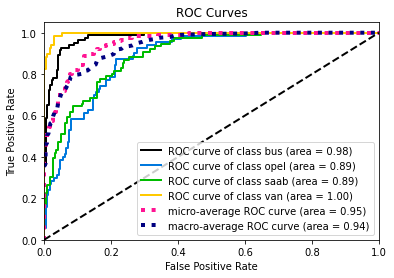

In [3194]:
skplt.metrics.plot_roc_curve(y_test, y_proba)
plt.show()

In [3195]:
from sklearn.metrics import accuracy_score
print("Accuracy", accuracy_score(y_test, y_pred))
#0.7946127946127947 max score

Accuracy 0.31986531986531985


In [3196]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA(principal component analysis) to the train part of the data. Build the explaided variance plot. 

In [3197]:
#X_train = X_train_pd
X_train_pca =  X_train
X_test_pca = X_test

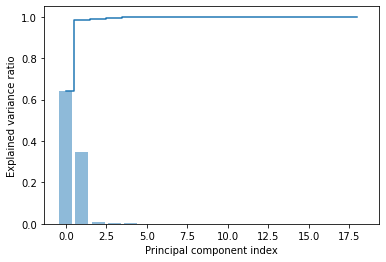

In [3198]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)
explained_variance = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(explained_variance)
plt.bar(range(0,len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [3199]:
### YOUR CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [3200]:

X_train_3 = X_train
y_train_3 = y_train
X_test_3 =  X_test
y_test_3 = y_test

In [3201]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('svc', PCA(n_components = 2))])
pipe.fit(X_train_3, y_train_3)
pipe.fit(X_test_3, y_test_3)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svc', PCA(n_components=2))])

In [3202]:
pipe.score(X_test_3, y_test_3)

9.35723089463727

In [3203]:
pca.n_components_

19

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [3204]:
### YOUR CODE HERE


In [3205]:

X_train_4 = X_train
y_train_4 = y_train
X_test_4 =  X_test
y_test_4 = y_test

In [3206]:
#pipe = Pipeline([('scaler', MinMaxScaler()), ('svc', PCA(n_components = 2))])
#pipe.fit(X_train_4, y_train_4)
#pipe.fit(X_test_4, y_test_4)
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
pipe = Pipeline([('scaler', StandardScaler()), ('svc', PCA(n_components = 2))])
pipe.fit(X_train_4, y_train_4)
pipe.fit(X_test_4, y_test_4)

logistic = linear_model.LogisticRegression(solver='saga',multi_class='multinomial',max_iter=500,tol=1e-4)

logistic.fit(X_train_4, y_train_4)



scores_f1_2 = cross_val_score(logistic, X_train_4, y_train_4, cv=5, scoring='f1_macro')
scores_accuracy_2 = cross_val_score(logistic, X_train_4, y_train_4, cv=5, scoring='accuracy')
y_proba_2 = model.predict_proba(X_test_4)



/home/jctuesta/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jctuesta/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jctuesta/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jctuesta/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jctuesta/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jctuesta/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag

In [3207]:
from sklearn.metrics import accuracy_score
print (scores_f1.mean(),scores_accuracy_2.mean())


0.7749735673628211 0.6830859049207673


/home/jctuesta/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


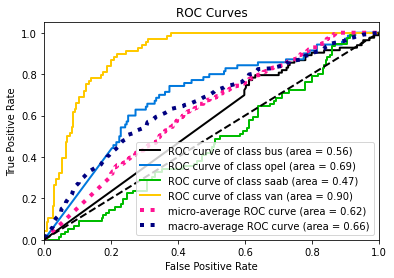

In [3208]:
skplt.metrics.plot_roc_curve(y_test_4, y_proba_2)
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [3209]:
X_train_5 = X_train
y_train_5 = y_train
X_test_5 =  X_test
y_test_5 = y_test


In [3210]:
from sklearn import preprocessing
pipe = Pipeline([('scaler', MinMaxScaler()), ('svc', PCA(n_components = 2))])
pipe.fit(X_train_5, y_train_5)
pipe.fit(X_test_5, y_test_5)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svc', PCA(n_components=2))])

In [3211]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [3212]:
#model_tree = DecisionTreeClassifier(criterion="entropy", max_depth=7)
#model_tree = model_tree.fit(X_train_5,y_train_5)
#y_pred_tree = model_tree.predict(X_test_5)




In [3221]:

accuracy_scores = []
for deph in list(range(1,20)):
  model_tree = DecisionTreeClassifier(criterion="entropy", max_depth=deph).fit(X_train_5,y_train_5)
  y_pred_tree = model_tree.predict(X_test_5)
  scores_f1_2 = cross_val_score(model_tree, X_train_5, y_train_5, cv=10, scoring='f1_macro')
  scores_accuracy_2 = cross_val_score(model_tree, X_train_5, y_train_5, cv=10, scoring='accuracy')
  #print(deph,"Accuracy:",deph,metrics.accuracy_score(y_test_5, y_pred_tree))
  #print(deph,"Accuracy:",metrics.accuracy_score(y_test_5, y_pred_tree))
  print (deph, scores_f1_2.mean(), scores_accuracy_2.mean())
#dehp 8 max

1 0.27949213454786426 0.419023569023569
2 0.4341691080501643 0.499057239057239
3 0.5851695268359733 0.6340067340067341
4 0.6486424018418491 0.6793265993265994
5 0.6722772114715003 0.6939057239057239
6 0.6642752227997865 0.673939393939394
7 0.7071098153502873 0.7103367003367003
8 0.713949126834572 0.7230976430976431
9 0.7107607759664349 0.7102356902356903
10 0.7295871618074066 0.7266329966329965
11 0.7260240046351142 0.7103030303030303
12 0.7142183602566848 0.7103367003367004
13 0.7105715039620778 0.6866329966329967
14 0.7362005994386024 0.7266666666666668
15 0.7146203103348936 0.734074074074074
16 0.7338513800705125 0.7120875420875421
17 0.7294925017585827 0.7230976430976431
18 0.7412244711666773 0.7048148148148148
19 0.720448908232865 0.713939393939394


In [3222]:
model_tree = DecisionTreeClassifier(criterion="entropy", max_depth=8).fit(X_train_5,y_train_5)
y_pred_tree = model_tree.predict(X_test_5)
cross_val_score(model_tree, X_train_5, y_train_5, cv=10,scoring='f1_macro').mean()

0.7131863412340305

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [3217]:
# YOUR CODE HERE

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [3218]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [3219]:
# YOUR CODE HERE